### Naver Rest API
- 파파고 번역 api
- 통합검색어 트렌드 api

#크롤링 정책

#robots.txt : 웹페이지의 크롤링 정책 설명한 페이지

#크롤링 법은 없지만, 과도한 크롤링으로 서비스에 영향을 주었을경우 업무방해 혐의로 고소당할 수 있음

#법정문제 : 지적재산권, 서비스과부화, 데이터 사용 표준

#API 사용 : 데이터를 가지고 있는 업체에서 데이터를 가져갈 수 있도록 하는 서비스

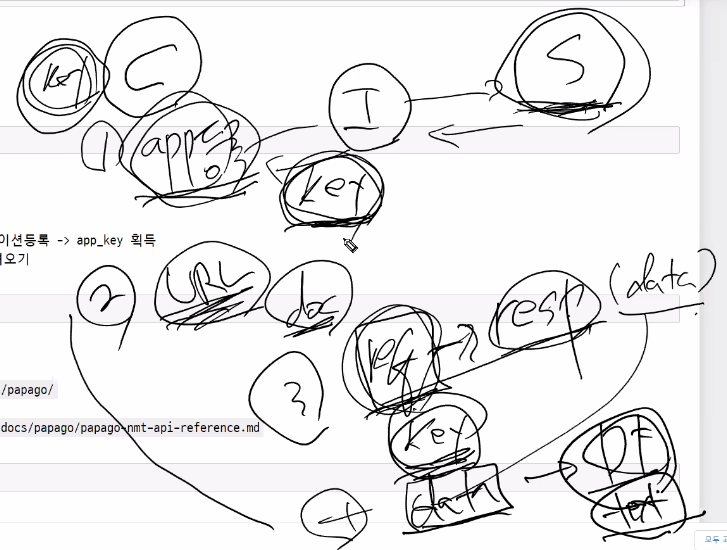

#### 0. request token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

In [2]:
import pandas as pd
import requests, json

#### 1. 파파고 번역 api
- `https://developers.naver.com/docs/papago/`
- 사용법
    - `https://developers.naver.com/docs/papago/papago-nmt-api-reference.md`

In [57]:
#1. API 문서 : URL
CLIENT_ID, CLIENT_SECRET = "D_I755lo7LlG7_MAyI8_", "cv3rXfHlzD"
ko_txt = "웹 크롤링은 재미있습니다."
url = "https://openapi.naver.com/v1/papago/n2mt"
headers = {
    "Content-Type" : "application/json",
    "X-Naver-Client-Id" : CLIENT_ID,
    "X-Naver-Client-Secret" : CLIENT_SECRET
}
params = {"source" : "ko", "target" : "en", "text" : ko_txt} #3개의 파라미터를 필수로 추가해야(Y) 에러가 뜨지 않는다 https://developers.naver.com/docs/nmt/reference/
params

{'source': 'ko', 'target': 'en', 'text': '웹 크롤링은 재미있습니다.'}

In [11]:
#2. request(URL, key, ko_txt) > response : json(str)
response = requests.post(url, json.dumps(params), headers = headers) #파파고 API 메서드가 post방식이라 post 사용, json.dumps : 한국어를 영문, 특수문자, 숫자형태로 변환해서 데이터를 전송
response.text

'{"message":{"result":{"srcLangType":"ko","tarLangType":"en","translatedText":"Web crawling is fun.","engineType":"N2MT","pivot":null,"dict":null,"tarDict":null,"modelVer":"Unknown"},"@type":"response","@service":"naverservice.nmt.proxy","@version":"1.0.0"}}'

In [8]:
#3. json(str) : en_txt
response.json()["message"]["result"]["translatedText"]

'Web crawling is fun.'

In [12]:
#4. make function
def translate(txt, source = "ko", target = "en"):
    CLIENT_ID, CLIENT_SECRET = "D_I755lo7LlG7_MAyI8_", "cv3rXfHlzD"
    url = "https://openapi.naver.com/v1/papago/n2mt"
    headers = {
        "Content-Type" : "application/json",
        "X-Naver-Client-Id" : CLIENT_ID,
        "X-Naver-Client-Secret" : CLIENT_SECRET
    }
    params = {"source" : source, "target" : target, "text" : txt}
    response = requests.post(url, json.dumps(params), headers = headers)
    return response.json()["message"]["result"]["translatedText"]

In [13]:
translate("기먼선 일해라")

'Kimanson, work hard.'

In [15]:
df = pd.DataFrame({
    "id" : list("AB"),
    "title" : ["인공지능 스쿨 파이팅", "데이터 크롤링"]
})
df

,id,title
0,A,인공지능 스쿨 파이팅
1,B,데이터 크롤링


In [16]:
df["en_title"] = df["title"].apply(translate)
df

,id,title,en_title
0,A,인공지능 스쿨 파이팅,"AI school, fighting!"
1,B,데이터 크롤링,Crawling data


In [17]:
df.to_excel("en_title.xlsx", index = False, encoding = "utf-8-sig")

In [19]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: EE2D-1664

 C:\Users\User\학생용\2023.02.16_웹크롤링_실습자료\day1 디렉터리

2023-02-16  오후 04:18    <DIR>          .
2023-02-16  오후 04:18    <DIR>          ..
2023-02-16  오후 03:12    <DIR>          .ipynb_checkpoints
2023-02-16  오후 02:30           304,634 01_requests_naver_stock.ipynb
2023-02-16  오후 03:11            46,302 02_requests_daum_exchange.ipynb
2023-02-16  오후 04:17           261,741 03_naver_api.ipynb
2023-02-13  오후 05:31             2,554 04_requests_zigbang.ipynb
2023-02-16  오후 04:18             5,555 en_title.xlsx
               5개 파일             620,786 바이트
               3개 디렉터리  115,935,563,776 바이트 남음


#### 2. 통합검색어 트렌드 api
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

In [3]:
#1. API 문서 : URL
CLIENT_ID, CLIENT_SECRET = "D_I755lo7LlG7_MAyI8_", "cv3rXfHlzD"
url ="https://openapi.naver.com/v1/datalab/search"
params = {
    "startDate" : "2018-01-01",
    "endDate" : "2023-02-16",
    "timeUnit" : "month",
    "keywordGroups" : [
        {"groupName" : "트위터", "keywords" : ["트위터", "트윗"]},
        {"groupName" : "페이스북", "keywords" : ["페이스북", "페북"]},
        {"groupName" : "인스타그램", "keywords" : ["인스타그램", "인스타"]}
    ]
}

In [4]:
headers = {
        "Content-Type" : "application/json",
        "X-Naver-Client-Id" : CLIENT_ID,
        "X-Naver-Client-Secret" : CLIENT_SECRET
    }

In [21]:
%whos

Variable        Type         Data/Info
--------------------------------------
CLIENT_ID       str          D_I755lo7LlG7_MAyI8_
CLIENT_SECRET   str          cv3rXfHlzD
df              DataFrame      id        title        <...>크롤링         Crawling data
headers         dict         n=3
json            module       <module 'json' from 'C:\\<...>\lib\\json\\__init__.py'>
ko_txt          str          웹 크롤링은 재미있습니다.
params          dict         n=3
pd              module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
requests        module       <module 'requests' from '<...>\\requests\\__init__.py'>
response        Response     <Response [200]>
translate       function     <function translate at 0x000001DB79F90940>
url             str          https://openapi.naver.com/v1/papago/n2mt


In [6]:
#2. request(URL) > response : json(str)
response = requests.post(url, json.dumps(params), headers = headers)
response.json()

{'startDate': '2018-01-01',
 'endDate': '2023-02-17',
 'timeUnit': 'month',
 'results': [{'title': '트위터',
   'keywords': ['트위터', '트윗'],
   'data': [{'period': '2018-01-01', 'ratio': 14.59502},
    {'period': '2018-02-01', 'ratio': 13.0238},
    {'period': '2018-03-01', 'ratio': 12.97953},
    {'period': '2018-04-01', 'ratio': 12.82991},
    {'period': '2018-05-01', 'ratio': 13.05391},
    {'period': '2018-06-01', 'ratio': 13.34512},
    {'period': '2018-07-01', 'ratio': 13.02773},
    {'period': '2018-08-01', 'ratio': 13.45399},
    {'period': '2018-09-01', 'ratio': 12.83755},
    {'period': '2018-10-01', 'ratio': 13.05677},
    {'period': '2018-11-01', 'ratio': 12.77338},
    {'period': '2018-12-01', 'ratio': 12.86931},
    {'period': '2019-01-01', 'ratio': 13.31172},
    {'period': '2019-02-01', 'ratio': 11.74776},
    {'period': '2019-03-01', 'ratio': 11.82313},
    {'period': '2019-04-01', 'ratio': 12.32991},
    {'period': '2019-05-01', 'ratio': 12.43771},
    {'period': '2019-06-

In [7]:
#3. json(str) > list, dict > DataFrame
results = response.json()["results"]
results[0]

{'title': '트위터',
 'keywords': ['트위터', '트윗'],
 'data': [{'period': '2018-01-01', 'ratio': 14.59502},
  {'period': '2018-02-01', 'ratio': 13.0238},
  {'period': '2018-03-01', 'ratio': 12.97953},
  {'period': '2018-04-01', 'ratio': 12.82991},
  {'period': '2018-05-01', 'ratio': 13.05391},
  {'period': '2018-06-01', 'ratio': 13.34512},
  {'period': '2018-07-01', 'ratio': 13.02773},
  {'period': '2018-08-01', 'ratio': 13.45399},
  {'period': '2018-09-01', 'ratio': 12.83755},
  {'period': '2018-10-01', 'ratio': 13.05677},
  {'period': '2018-11-01', 'ratio': 12.77338},
  {'period': '2018-12-01', 'ratio': 12.86931},
  {'period': '2019-01-01', 'ratio': 13.31172},
  {'period': '2019-02-01', 'ratio': 11.74776},
  {'period': '2019-03-01', 'ratio': 11.82313},
  {'period': '2019-04-01', 'ratio': 12.32991},
  {'period': '2019-05-01', 'ratio': 12.43771},
  {'period': '2019-06-01', 'ratio': 13.29913},
  {'period': '2019-07-01', 'ratio': 14.00593},
  {'period': '2019-08-01', 'ratio': 14.208},
  {'period

In [38]:
# columns : period, ratio, title
dfs = []
for result in results: #3번 반복 : 트위터 - 페북 - 인스타
    df = pd.DataFrame(result["data"])
    df["title"] = result["title"]
    dfs.append(df)

In [45]:
result_df = pd.concat(dfs, ignore_index = True)
result_df.tail(2)

,period,ratio,title
184,2023-01-01,20.30135,인스타그램
185,2023-02-01,10.55313,인스타그램


In [ ]:
#column : title(twitter, facebook, instagram)
#index : period
#value : ratio

In [47]:
pivot_df = result_df.pivot(index = "period", columns = "title", values = "ratio")
pivot_df.tail(2)

title,인스타그램,트위터,페이스북
period,,,
2023-01-01,20.30135,26.64944,14.87866
2023-02-01,10.55313,13.56007,7.00545


In [49]:
#update : 데이터선택 = 수정할데이터
pivot_df.columns = ["instagram", "twitter", "facebook"]

In [50]:
pivot_df.tail(2)

,instagram,twitter,facebook
period,,,
2023-01-01,20.30135,26.64944,14.87866
2023-02-01,10.55313,13.56007,7.00545


In [54]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = {"png", "retina"}

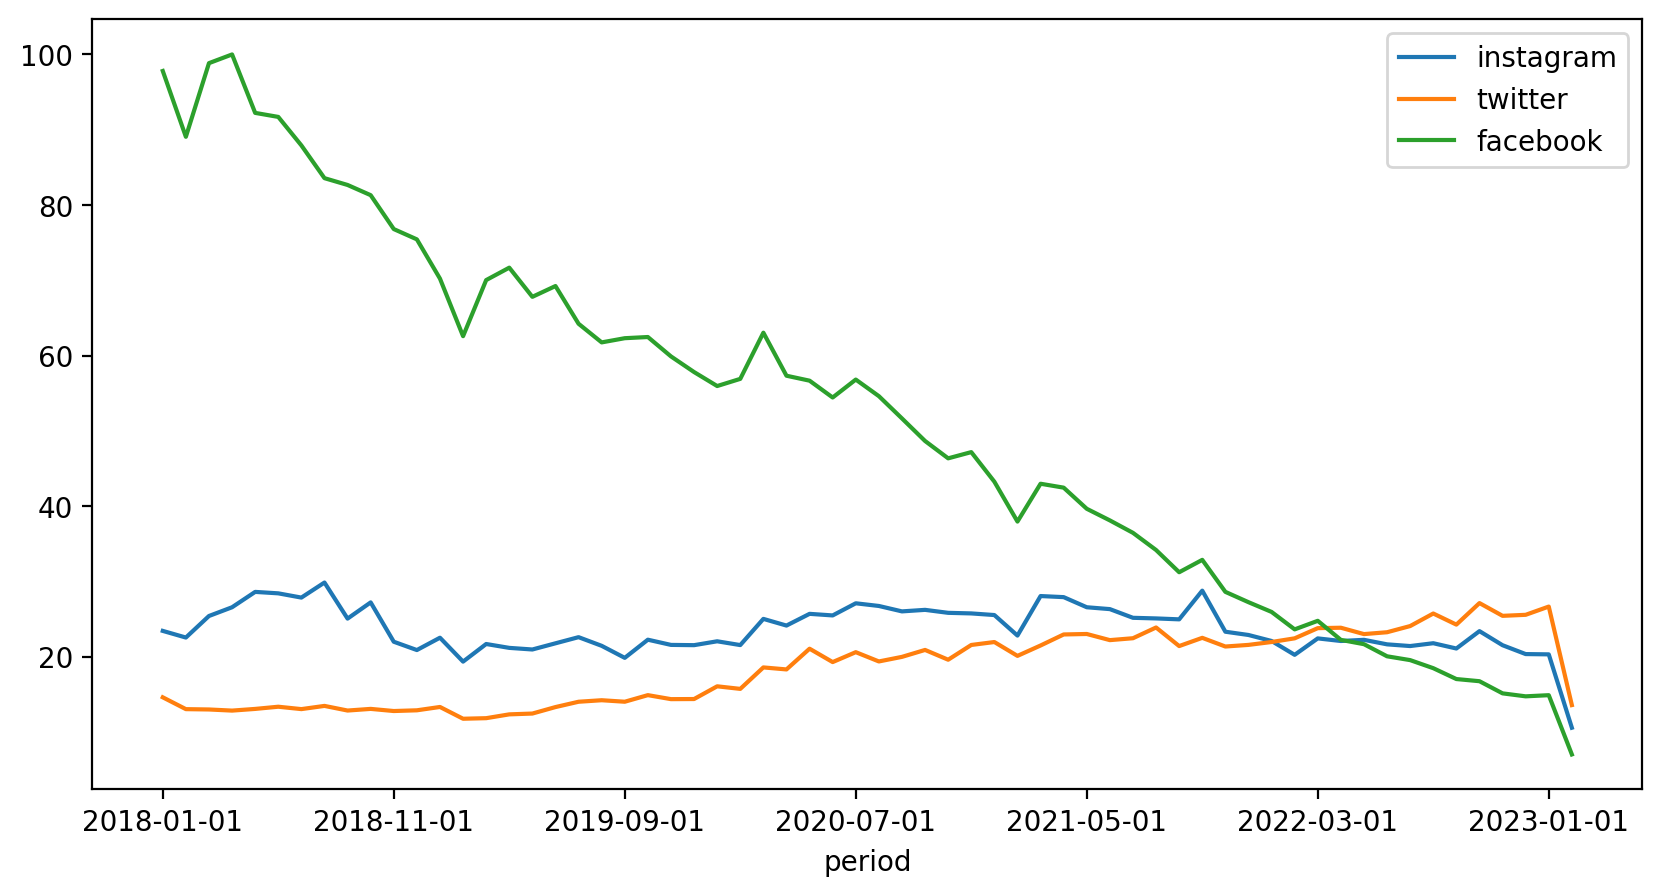

In [55]:
pivot_df.plot(figsize = (10, 5))
plt.show()